In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics                                
import os

In [5]:
data = pd.read_csv('C:/Users/mohtm/OneDrive/Desktop/AI Alg Project/Mall_Customers.csv', index_col=0)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


Taking Full Fraction of Data
It shuffles the data

In [7]:
data = data.sample(frac=1)

In [8]:
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
100,61,49
163,81,5
135,73,5
121,67,56
127,71,35


K-Means

In [10]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#Labels

In [12]:
k_means.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0])

In [13]:
np.unique(k_means.labels_)

array([0, 1])

In [14]:
centers = k_means.cluster_centers_
centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

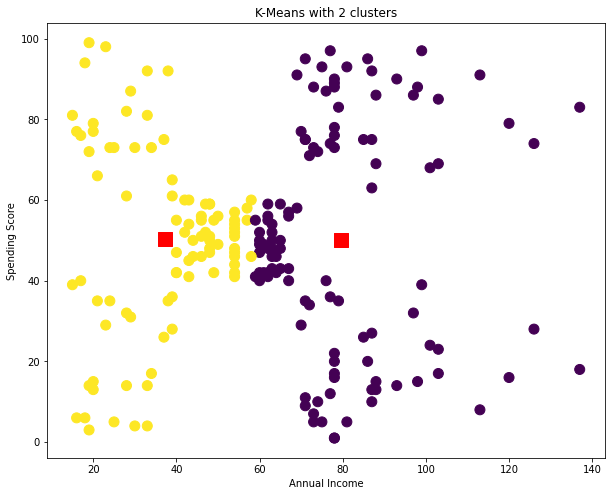

In [15]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

A proportion of how comparable a point is to different focuses in its own bunch and how extraordinary it is from focuses in different groups.

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.29689691625030085


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

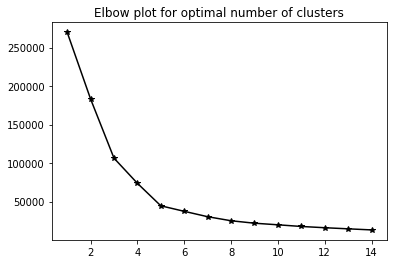

In [18]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

In [16]:
#KMeans clustering with 5 clusters

In [17]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [19]:
centers = k_means.cluster_centers_

centers

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [20]:
#Displaying Data in 5 cluster form

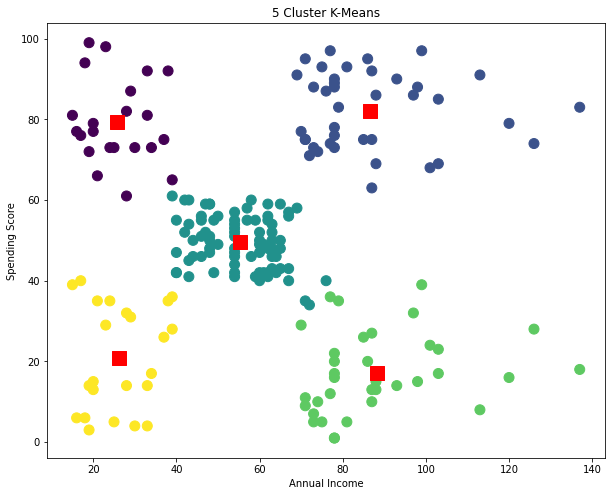

In [21]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

This is a better measure to decide the number of clusters to be formulated from the data.

In [23]:
score = metrics.silhouette_score(data, k_means.labels_)

print("Score = ", score)

Score =  0.553931997444648


This function returns the Silhouette Coefficient for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [24]:
score1 = metrics.silhouette_samples(data, k_means.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.7479776   0.61371866  0.53389918  0.54460203  0.19940439  0.58062414
  0.68008375  0.61822335  0.61636814  0.6774284   0.65696071  0.75333445
  0.69903269  0.49570828  0.55652321  0.74739227  0.1170758   0.42116018
  0.57181215  0.71908624  0.63283954  0.52881485  0.46477526  0.54589636
  0.64736478  0.64243997  0.50543845  0.11529355  0.61933811  0.54559672
  0.29204034  0.52881485  0.67788678  0.59306426  0.62850916  0.57321049
  0.59367906  0.73228236  0.74072908  0.37332421  0.34080466  0.53671842
  0.70493684  0.57400953  0.63883859  0.60337125  0.68358333  0.33164486
  0.71753797  0.44365896  0.28595404  0.47849409  0.48547142  0.6713546
  0.49666181  0.57697817  0.61775968  0.350038    0.60554668  0.5718828
  0.66933998  0.66126882  0.65391468  0.30155503  0.6346086   0.65972193
  0.6324437   0.34144075  0.54753461  0.29204034  0.60779683  0.10184214
  0.70488566  0.41700493  0.65596358  0.60922585  0.48378692  0.65309276
  0.32604311  0.2254125   0.33124639  0.7198

Affinitty propagation

It involves in finding a set of exemplars that best summarize the data

In [26]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(data)
yhat_aff = model_aff.predict(data)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1 2 3 4 5 6 7 8 9]


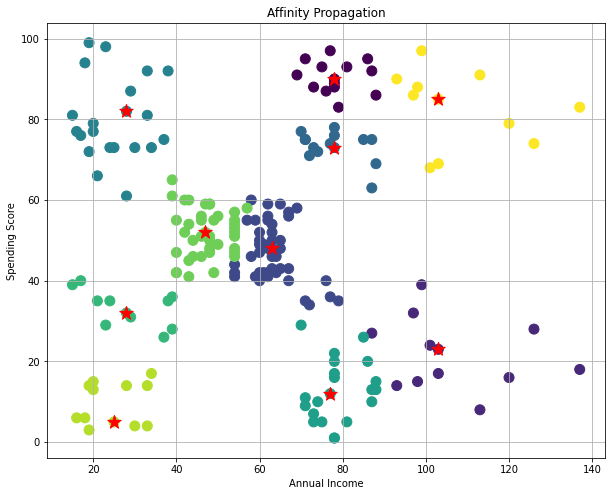

In [27]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [29]:
score_aff = metrics.silhouette_score(data,labels_aff)

print("Affinity Propagation Score= ", score_aff)

Affinity Propagation Score=  0.4444241960201344


BIRCH
Full Form is Balanced Irerative Reducing and Clustering using Heirarchies
It involves in constructing a tree structure from which cluster centroids are extracted

In [30]:
model_br = Birch(threshold=0.01, n_clusters=5)
model_br.fit(data)
yhat_br = model_br.predict(data)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

Clusters of Birch [0 1 2 3 4]


In [31]:
score_br = metrics.silhouette_score(data,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.5529945955148896


DBSCAN
Full Form is Density-Based Spatial Clustering of Applications with Noise
It is involved in finding high-density areas in the domain and expanding those areas of the feature around them as clusters

In [33]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

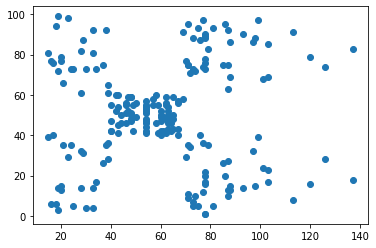

In [34]:
model = DBSCAN(eps=0.7, min_samples=90)
yhat = model.fit_predict(data_X)
clusters = unique(yhat)
for cluster in clusters:
     row_ix = where(yhat == cluster)
     plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
plt.show()
